# TASK - DESCRIPTION

Task 4: Business applications
Finally, use your simulations to solve a groundstate encoding problem for an industrial application. You may come up with your own, or look at one of the examples given in this recent preprint: i.e. Portfolio optimization (example VI), Network immunization (example VII), or Task scheduling (example XII). Set up a problem, and solve it on as large a graph as possible using adiabatic state preparation protocols. Link this to your Business Application.

# EXTRACTIVE SUMMARIZATION PROBLEM

Neutral atoms is obviously suitable to a set of optimization problems appearing in various industries from optimal antena placement in telecom to task scheduling at a manufacturing site and various trajectory planning applications in Space or Defence industries. 

Here we focused our attention on a less obvious application of a power of this emerging technology to Natural Language Processing. Namely, we propose to enhance existing text summarization pipelines via optimal groung state preparation. Potential application of such quantum-enhanced text summarization could immediately prove value in a variety of industries: from web content creation in e-commerce and Retail to media and governmental texts summaries.   

We base our hypothesis on a recent paper by Uckan et.al. (See https://www.sciencedirect.com/science/article/pii/S111086651930324X ) that proposed Extractive summarization approach based on MIS problem and presented results that are superior to alternative classical NLP methods on a standard ROUGE score metrics.  

Below we present a toy prototype of quantum-enhanced summarization using Bloqade. 

In [56]:
# imports 

using Random
Random.seed!(42)
using Graphs
using GenericTensorNetworks
using GenericTensorNetworks: unit_disk_graph
using Bloqade
using Optim
using PythonCall
plt = pyimport("matplotlib.pyplot");

# Text 1 

Quantum computing is one of the hottest topics in the technology sector today
The technology is enabling individuals and companies to solve computational problems that were previously considered intractable
Cryptography, chemistry, quantum simulation, optimization, machine learning, and numerous other fields have been significantly impacted by this technology
While quantum computers aren’t going to replace classical computers immediately, quantum technology is significantly changing the way the world operates
Many entities are focused on developing quantum computing hardware since this is the core bottleneck today

* Graph below contains vertices as sentences and edges represent strong semantic similarity between sentences. This preprocessing was done in NLP - sentence graph notebook. 

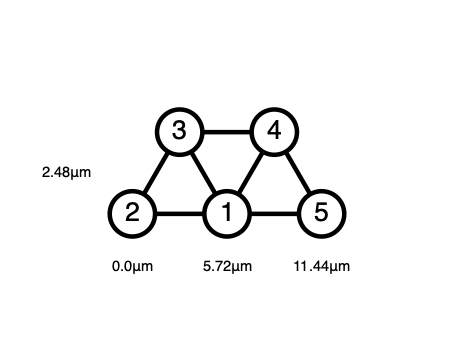

In [2]:
text_graph_1 = AtomList([(5.72, 0.0), (0.0, 0.0), (2.86, 4.95) , (8.58, 4.95), (11.44, 0.0)])
Bloqade.plot(text_graph_1, blockade_radius = 5.721)

# Text 2 

The tower is 324 metres (1,063 ft) tall. About the same height as an 81-storey building. It was the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. It was the first structure to reach a height of 300 metres. Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct.

* Graph below contains vertices as sentences and edges represent strong semantic similarity between sentences. This preprocessing was done in NLP - sentence graph notebook.

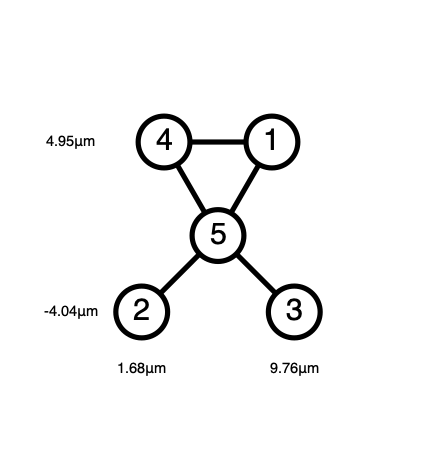

In [3]:
text_graph_2 = AtomList([ (8.58, 4.95), (1.6753, -4.044),(9.7646, -4.044), (2.86, 4.95),(5.72, 0.0) ])
Bloqade.plot(text_graph_2, blockade_radius = 5.721)

# Solving the MIS problem

In [4]:
# Prepare initial parameters

# Blocade radius
r_b = 5.721

# Total duration of pulses
t = 1.0

# Rabi Frequency
omega = 2 * π * 862690 / r_b^6

# Detuning amplitude
delta = 2π * 15.0

94.24777960769379

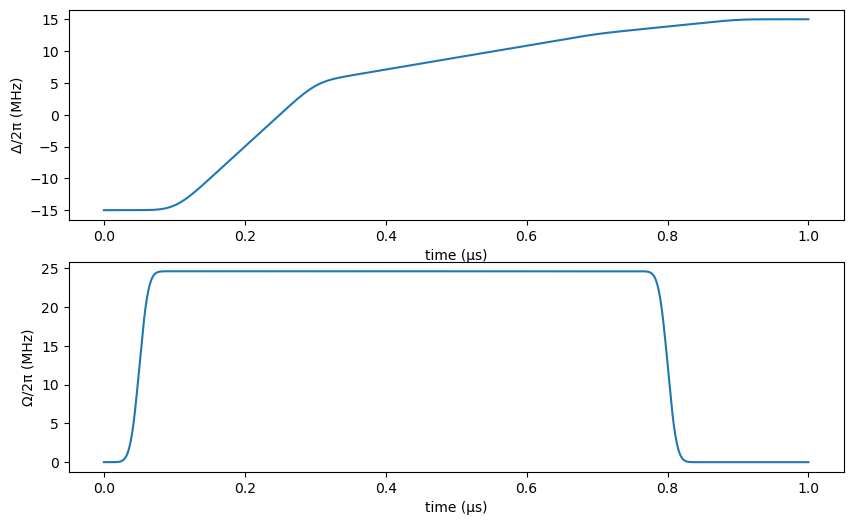

In [6]:
# Detuning protocol
d_change = 0.6

x_0 = [0.35, 0.6, 0.85]

delta_t = smooth(
        piecewise_linear(
            clocks = [0.0, 0.1 * t, 0.3 * t, 0.5 * t, 0.7 * t, 0.9 * t, t],
            values = [-delta, -delta, delta * x_0[1], delta * x_0[2], delta * x_0[3], delta, delta],
        );
        kernel_radius = 0.02,
    )
    

# Omega waveform
omega_t = piecewise_constant(clocks=[0.0, 0.05 * t, t * ((1 + d_change) / 2), t], values=[0.0, omega, 0.0])
omega_t = smooth(omega_t; kernel_radius=0.01 * t)

# Plotting waveforms
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (10, 6))
Bloqade.plot!(ax1, delta_t)
ax1.set_ylabel("Δ/2π (MHz)")
Bloqade.plot!(ax2, omega_t)
ax2.set_ylabel("Ω/2π (MHz)")
fig


# Evolve in the Blockade subspace

┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8
┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


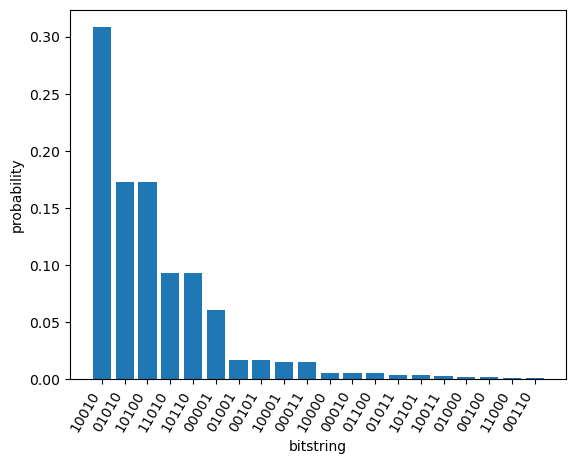

In [22]:
# Creating blockade subspace, Hamiltonian and emulation 
subspace = blockade_subspace(text_graph_1, r_b - 0.2)
reg = zero_state(subspace)
h = rydberg_h(text_graph_1; Ω = omega_t, Δ = delta_t)
prob_text_1 = SchrodingerProblem(reg, t, h)
emulate!(prob_text_1)


# Creating blockade subspace, Hamiltonian and emulation 
subspace = blockade_subspace(text_graph_2, r_b - 0.2)
reg = zero_state(subspace)
h = rydberg_h(text_graph_2; Ω = omega_t, Δ = delta_t)
prob_text_2 = SchrodingerProblem(reg, t, h)
emulate!(prob_text_2)
# Plotting bitstring histogram
bitstring_hist(prob_text_1.reg; nlargest = 20)

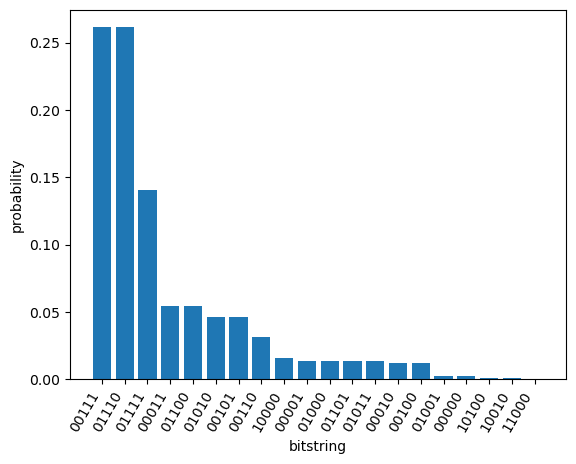

In [23]:
# Plotting bitstring histogram
bitstring_hist(prob_text_2.reg; nlargest = 20)

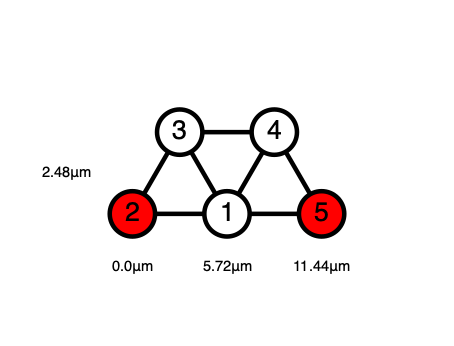

In [17]:
# Plotting MIS solution
# Text 1 
best_bit_strings = most_probable(prob_text_1.reg, 15)
Bloqade.plot(text_graph_1, blockade_radius = r_b;
    colors = [iszero(b) ? "white" : "red" for b in best_bit_strings[1]])

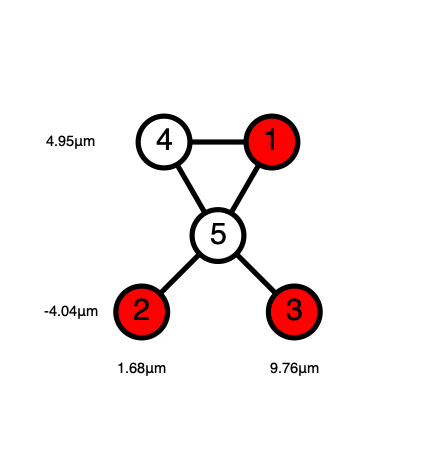

In [18]:
# Text 2 
best_bit_strings = most_probable(prob_text_2.reg, 15)
Bloqade.plot(text_graph_2, blockade_radius = r_b;
    colors = [iszero(b) ? "white" : "red" for b in best_bit_strings[1]])

# RESULTING NAIVE TEXT SUMMARIZATION WITH MIS

# Text 1 

Quantum computing is one of the hottest topics in the technology sector today The technology is enabling individuals and companies to solve computational problems that were previously considered intractable Cryptography, chemistry, quantum simulation, optimization, machine learning, and numerous other fields have been significantly impacted by this technology While quantum computers aren’t going to replace classical computers immediately, quantum technology is significantly changing the way the world operates Many entities are focused on developing quantum computing hardware since this is the core bottleneck today.

# Text 1 summarized by extrating sentences [1,3,4]

Quantum computing is one of the hottest topics in the technology sector today
Cryptography, chemistry, quantum simulation, optimization, machine learning, and numerous other fields have been significantly impacted by this technology
While quantum computers aren’t going to replace classical computers immediately, quantum technology is significantly changing the way the world operates

# Text 2

The tower is 324 metres (1,063 ft) tall. About the same height as an 81-storey building. It was the tallest structure in Paris. Its base is square, measuring 125 metres (410 ft) on each side. It was the first structure to reach a height of 300 metres. Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct.

# Text 2 summarized by extracting sentences [4, 5]


It was the first structure to reach a height of 300 metres. Excluding transmitters, the Eiffel Tower is the second tallest free-standing structure in France after the Millau Viaduct.

# HYBRID QML APPROACH TO FINE TUNE OPTIMIZATION SCHEME

The above solution is based on perfect MIS problem solving. However given flexibility of the detuning protocol we can optimize toward a designed objective: 
* style of the text, 
* page rank sum of the resulting nodes in the graph
* context diversity of different sentences
* other NLP metrics derived with further postprocessing of the resulting text. 

Below we finetune the adiabatic protocol to produce slightly different resulting bitstring for Text 1 - [01011].

In [54]:
# Loss function for detuning waveform
function loss_piecewise_constant(atoms::AtomList, x::AbstractVector{T}) where {T}

    delta_tt = smooth(
        piecewise_linear(
            clocks = [0.0, 0.1 * t, 0.3 * t, 0.5 * t, 0.7 * t, 0.9 * t, t],
            values = T[-delta, -delta, delta * x[1], delta * x[2], delta * x[3], delta, delta],
        );
        kernel_radius = 0.02,
    )
    
    hamiltonian = rydberg_h(atoms; Ω = omega_t, Δ = delta_tt)
    subspace = blockade_subspace(atoms, r_b - 0.2)
    prob = SchrodingerProblem(zero_state(subspace), t, hamiltonian)
    emulate!(prob)
    loss_f = sum(rydberg_density(prob.reg) .- Array([0.,1.,0.,1.,1.]))^2
    println("Value of cost function:", loss_f)
    
    return loss_f, prob.reg, delta_tt
end

loss_piecewise_constant (generic function with 1 method)

In [58]:
# Optimization of detuning waveform
x_0 = [0.35, 0.6, 0.85]
optresult = Optim.optimize(x -> loss_piecewise_constant(text_graph_1, x)[1], x_0)


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.7713968799053279


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.7670337605598944


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.8204999846929149


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.5872240659312286


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.5864386721739299


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.5618566934338183


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.4605918555126569


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.40196553268978025


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.5352803243888326


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.6328598862300452


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.5019526727068792


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.44324924656026593


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.6169807849544082


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.45077248863220853


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.36662904006602154


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.32654397956008757


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.3567079614350113


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.35654496453255746


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.12537100746226454


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.08724827289203871


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.05471666882333934


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.08509204163613625


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.05872656291134551


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.009602905438670359


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.04433955898646285


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.043295203628656534


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.03351802410333665


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.008728861304680592


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.275129232472396


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.049286748782465514


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.016641546640975915


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.00959672261567563


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.2189830635785804


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.030726655271125985


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.008068006032136522


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.06555257556206762


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.04148320790058724


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.05601315439887749


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.010335177422425694


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.3307940659682991


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.057184397920047


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.006765536216144776


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.008286778147607123


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.06885253861179008


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.31096359648675104


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.03602709504412186


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.10057115426174594


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.017715131409992955


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.029512562708212568


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.010849393382187322


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.013072852730150205


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.008442196779196363


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.008988118159202186


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.007613016372942858


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.007148069141503583


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.006502661126405991


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.007589760876829688


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.0051432394133967335


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.004824098383118187


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.013195103734388522


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.005998477754083868


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.004558898577034268


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.004267807966859945


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.00377765100930906


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.003542527548180312


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.0020404831287458174


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.0014026967143843832


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.0030161564192327465


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.0008300029088151742


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.00030582346253967864


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.00019323088462759274


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:8.479098708619939e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.0007201937786448049


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:8.909895487427857e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.0008621885758077502


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:5.281494818748265e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.004488920482171574


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.3442591509424787e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.0007879469344185883


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:3.180383886510904e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.00011727375413840133


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:2.425715225699352e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:2.6789811069236828e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.00038410390291946126


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.3254791946578313e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:5.044960094222897e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:3.710559585476066e-6


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:2.8329402457148803e-6


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.4307900125183693e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:2.592244486638272e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:2.891294582508493e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:0.00012404139417398818


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.2351803443835528e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:3.1714462676865084e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:6.612293481258381e-6


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:8.229641843745952e-6


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:3.088207383395386e-6


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.641598997641718e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.3455890199791281e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:3.437423752119107e-6


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.504139411861423e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:2.72296633535639e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:3.4994087872110604e-6


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:4.725171830941239e-6


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:2.5488831500263117e-6


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:5.22115119163498e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.2360245239491686e-9


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:2.364015132753202e-5


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:6.394498434020013e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:3.8510426383029684e-8


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:7.277995585602063e-8


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:4.4837388433520624e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:6.485837970646581e-6


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:3.945561543002699e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.4245070186789004e-6


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:2.1740948878752323e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:3.416618409133195e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.038810274924548e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:8.30666146371501e-8


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.8163098950801164e-8


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:3.588191407827478e-7


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.8529074602996995e-8


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:9.599792449594943e-11


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:1.6032790294170613e-8


┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:6.952033524670919e-10


LoadError: UndefVarError: atom_coordinate not defined

┌ Warning: graph has empty edges, creating a subspace contains the entire fullspace, consider using a full space register.
└ @ BloqadeMIS /Users/mykola/.julia/packages/BloqadeMIS/TgzxA/src/subspace.jl:8


Value of cost function:9.599792449594943e-11


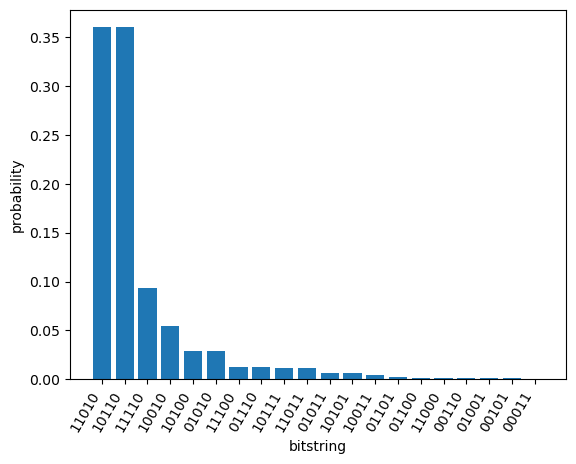

In [59]:
rydberg_density_final, reg1_final, waveform = loss_piecewise_constant(text_graph_1, optresult.minimizer)
bitstring_hist(reg1_final; nlargest = 20)

Plot above showcases that model is now fine-tuned to produce bitstring [0,1,0,1,1]. Similarly loss function may be modified to maximize NLP-based metrics. 

The resulting protocol is plotted below.

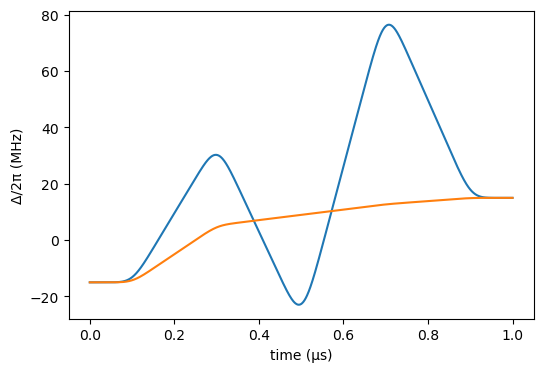

In [60]:
# Optimized waveform compare to start

delta_0 = smooth(
    piecewise_linear(
        clocks = [0.0, 0.1 * t, 0.3 * t, 0.5 * t, 0.7 * t, 0.9 * t, t],
        values = [-delta, -delta, delta * x_0[1], delta * x_0[2], delta * x_0[3], delta, delta],
    );
    kernel_radius = 0.02,
)
    
fig, ax1 = plt.subplots(ncols = 1, figsize = (6, 4))
Bloqade.plot!(ax1, waveform)
Bloqade.plot!(ax1, delta_0)
ax1.set_ylabel("Δ/2π (MHz)")
fig